# brain_age

Predict age from brain grey matter (regression).
Aging is associated with is grey matter (GM) atrophy, each year, an adult lose
0.1% of GM. We will try to learn a predictor of the chronological age (true age)
using GM measurements on the brain on a population of healthy control participants.

Such a predictor provides the expected **brain age** of a subject. Deviation from
this expected brain age indicates acceleration or slowdown of the aging process
which may be associated with a pathological neurobiological process or protective factor of aging.

## Dataset

There are 357 samples in the training set and 90 samples in the test set.

### Input data

Voxel-based_morphometry [VBM](https://en.wikipedia.org/wiki/Voxel-based_morphometry)
using [cat12](http://www.neuro.uni-jena.de/cat/) software which provides:

- Regions Of Interest (`rois`) of Grey Matter (GM) scaled for the Total
  Intracranial Volume (TIV): `[train|test]_rois.csv` 284 features.

- VBM GM 3D maps or images (`vbm3d`) of [voxels](https://en.wikipedia.org/wiki/Voxel) in the
  [MNI](https://en.wikipedia.org/wiki/Talairach_coordinates) space:
  `[train|test]_vbm.npz` contains 3D images of shapes (121, 145, 121).
  This npz contains the 3D mask and the affine transformation to MNI
  referential. Masking the brain provide *flat* 331 695 input features (voxels)
  for each participant.

By default `problem.get_[train|test]_data()` return the concatenation of 284 ROIs of
Grey Matter (GM) features with 331 695 features (voxels) within a brain mask.
Those two blocks are higly redundant.
To select only on ROIs (`rois`) features do:

```
X[:, :284]
```

To select only on (`vbm`) (voxel with the brain) features do:

```
X[:, 284:]
```

### Target

The target can be found in `[test|train]_participants.csv` files, selecting the
`age` column for regression problem.

## Evaluation metrics

[sklearn metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

The main Evaluation metrics is the Root-mean-square deviation
[RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation). We will also
look at the R-squared
[R2](https://en.wikipedia.org/wiki/Coefficient_of_determination).


## Links


- [RAMP-workflow’s documentation](https://paris-saclay-cds.github.io/ramp-workflow/)
- [RAMP-workflow’s github](https://github.com/paris-saclay-cds/ramp-workflow)
- [RAMP Kits](https://github.com/ramp-kits)

## Installation

This starting kit requires Python and the following dependencies:

* `numpy`
* `scipy`
* `pandas`
* `scikit-learn`
* `matplolib`
* `seaborn`
* `jupyter`
* `ramp-workflow`

Therefore, we advise you to install [Anaconda
distribution](https://www.anaconda.com/download/) which include almost all
dependencies.

Only `nilearn` and `ramp-workflow` are not included by default in the Anaconda
distribution. They will be installed from the execution of the notebook.

To run a submission and the notebook you will need the dependencies listed in requirements.txt.
You can install the dependencies with the following command-line:

```
pip install -U -r requirements.txt
```

If you are using conda, we provide an environment.yml file for similar usage.

```
conda env create -f environment.yml
```

Then, you can activate the environment using:

```
conda activate brain_age
```

And desactivate using

```
conda deactivate
```

## Getting started

1. Download the data locally:

```
python download_data.py
```

2. Execute the jupyter notebook, from the root directory using:

```
jupyter notebook brain_age_starting_kit.ipynb
```

Tune your model using the starting_kit

3. Submission (Run locally)

The submissions need to be located in the `submissions` folder.
For instance for `starting_kit`, it should be located in
`submissions/submissions/starting_kit`.

Copy everything required to build your estimator in a submission file:
`submissions/submissions/starting_kit/estimator.py`.
This file must contain a function `get_estimator()`.

Run locally:

```
ramp-test --submission starting_kit
```

4. Submission on RAMP:

[Using RAMP starting-kits](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html)

## Descriptive statistics

age                                                         \
       count       mean        std        min        25%        50%   
set                                                                   
test    90.0  47.848019  17.852717  20.071184  31.819986  44.855578   
train  357.0  49.138846  16.095719  19.980835  35.455168  50.902122   

                             
             75%        max  
set                          
test   62.017112  82.187543  
train  62.061602  86.318960

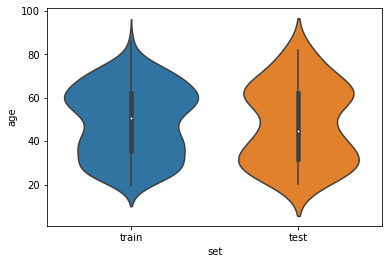

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

participants_train = pd.read_csv(os.path.join("data", "train_participants.csv" ))
participants_train["set"] = 'train'
participants_test = pd.read_csv(os.path.join("data", "test_participants.csv" ))
participants_test["set"] = 'test'
participants = participants_train.append(participants_test)

sns.violinplot(x="set", y="age", data=participants)
participants[["age", "set"]].groupby("set").describe()

## Unsupervized analysis: Explore main sources of variabilities


Load ROIs data

In [2]:
globvol_rois_train = pd.read_csv(os.path.join("data", "train_rois.csv"))
print(globvol_rois_train.iloc[:5, :10])
print(globvol_rois_train.columns)

   participant_id     CSF_Vol      GM_Vol      WM_Vol  l3thVen_GM_Vol  \
0             651  334.031002  603.083565  560.465707        0.046239   
1             431  300.991328  603.101354  594.425495        0.052599   
2             398  252.410342  641.965684  604.320324        0.063052   
3             419  402.533442  604.978032  490.709738        0.043962   
4             627  409.460047  579.029937  509.311974        0.042226   

   r3thVen_GM_Vol  l4thVen_GM_Vol  r4thVen_GM_Vol  lAcc_GM_Vol  rAcc_GM_Vol  
0        0.052240        0.063827        0.068097     0.419533     0.427702  
1        0.047901        0.088186        0.105241     0.373451     0.377817  
2        0.051575        0.083113        0.076834     0.447264     0.465415  
3        0.041684        0.089264        0.083791     0.391540     0.388656  
4        0.036072        0.073829        0.081725     0.339043     0.358513  
Index(['participant_id', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol',
       'r3thVen_GM_

In [3]:
globvol_rois_train.iloc[:5, :4]

,participant_id,CSF_Vol,GM_Vol,WM_Vol
0,651,334.031002,603.083565,560.465707
1,431,300.991328,603.101354,594.425495
2,398,252.410342,641.965684,604.320324
3,419,402.533442,604.978032,490.709738
4,627,409.460047,579.029937,509.311974


In [4]:
globvol_rois_train.iloc[:5, 4:150]

,l3thVen_GM_Vol,r3thVen_GM_Vol,l4thVen_GM_Vol,r4thVen_GM_Vol,lAcc_GM_Vol,rAcc_GM_Vol,lAmy_GM_Vol,rAmy_GM_Vol,lBst_GM_Vol,rBst_GM_Vol,...,lTemPo_GM_Vol,rTemPo_GM_Vol,lInfFroAngGy_GM_Vol,rInfFroAngGy_GM_Vol,lTemTraGy_GM_Vol,rTemTraGy_GM_Vol,l3thVen_CSF_Vol,r3thVen_CSF_Vol,l4thVen_CSF_Vol,r4thVen_CSF_Vol
0,0.046239,0.052240,0.063827,0.068097,0.419533,0.427702,0.959560,0.926567,0.423190,0.475538,...,9.102747,8.410137,3.092594,2.691483,1.578891,1.281349,0.332883,0.228472,0.590833,0.587328
1,0.052599,0.047901,0.088186,0.105241,0.373451,0.377817,1.069637,0.976732,0.548313,0.646422,...,8.172547,7.439690,3.060540,3.158229,1.313621,0.925736,0.373751,0.271285,0.550180,0.554138
2,0.063052,0.051575,0.083113,0.076834,0.447264,0.465415,1.043697,0.930962,0.404125,0.448916,...,8.230232,7.488902,3.272772,3.463170,1.197065,1.209930,0.304946,0.212492,0.662675,0.711060
3,0.043962,0.041684,0.089264,0.083791,0.391540,0.388656,1.008897,1.005822,0.554708,0.679916,...,7.871302,8.194143,2.732576,2.725683,1.214867,1.103285,0.450882,0.315385,0.561368,0.623134
4,0.042226,0.036072,0.073829,0.081725,0.339043,0.358513,0.690936,0.813410,0.438054,0.467994,...,7.641806,8.027564,2.721012,2.685306,1.031475,0.890713,0.514473,0.356318,0.641003,0.655520


In [17]:
globvol_rois_train.head()

,participant_id,CSF_Vol,GM_Vol,WM_Vol,l3thVen_GM_Vol,r3thVen_GM_Vol,l4thVen_GM_Vol,r4thVen_GM_Vol,lAcc_GM_Vol,rAcc_GM_Vol,...,lSupParLo_CSF_Vol,rSupParLo_CSF_Vol,lSupTemGy_CSF_Vol,rSupTemGy_CSF_Vol,lTemPo_CSF_Vol,rTemPo_CSF_Vol,lInfFroAngGy_CSF_Vol,rInfFroAngGy_CSF_Vol,lTemTraGy_CSF_Vol,rTemTraGy_CSF_Vol
0,651,334.031002,603.083565,560.465707,0.046239,0.052240,0.063827,0.068097,0.419533,0.427702,...,9.417022,8.434683,2.347495,2.171560,5.581092,5.706735,1.890379,1.612733,0.282384,0.266220
1,431,300.991328,603.101354,594.425495,0.052599,0.047901,0.088186,0.105241,0.373451,0.377817,...,7.536400,9.255206,1.916260,2.486424,4.316001,4.436970,1.498470,1.539997,0.353374,0.321598
2,398,252.410342,641.965684,604.320324,0.063052,0.051575,0.083113,0.076834,0.447264,0.465415,...,4.173962,4.718189,1.629146,2.401178,4.425915,5.277551,1.237723,1.587169,0.268964,0.222488
3,419,402.533442,604.978032,490.709738,0.043962,0.041684,0.089264,0.083791,0.391540,0.388656,...,9.709334,8.910621,2.647267,2.810882,5.631827,6.304696,2.004819,1.836838,0.414907,0.470546
4,627,409.460047,579.029937,509.311974,0.042226,0.036072,0.073829,0.081725,0.339043,0.358513,...,9.136128,9.851541,3.001734,2.822341,6.769050,6.473654,2.135641,2.037486,0.418933,0.439689


`train_rois.csv` provides:

- Global volumes of "tissues": CerrebroSpinal Fluid (`CSF_Vol`), Grey (`GM_Vol`) and White Matter (`WM_Vol`) volume of participants.
- ROIs are starting at column `l3thVen_GM_Vol`. Note that `rois_train.loc[:, 'l3thVen_GM_Vol':]` matches `problem.get_train_data()[:, :284]`.

In [18]:
rois_train = globvol_rois_train.loc[:, 'l3thVen_GM_Vol':]
vols_train = globvol_rois_train.loc[:, ['CSF_Vol', 'GM_Vol', 'WM_Vol']]

### PCA on ROIs: explore global effect of age

In [19]:
from sklearn.decomposition import PCA

pca_rois = PCA(n_components=2)
PCs_rois = pca_rois.fit_transform(rois_train)
print(pca_rois.explained_variance_ratio_)

df = pd.DataFrame(dict(age=participants_train['age'], PC1_ROIs=PCs_rois[:, 0], PC2_ROIs=PCs_rois[:, 1]))

[0.54771351 0.10711543]


Main sources of variability ?


               age      PC1_ROIs      PC2_ROIs
age       1.000000  8.177015e-01 -1.108805e-01
PC1_ROIs  0.817702  1.000000e+00 -3.987881e-17
PC2_ROIs -0.110881 -3.987881e-17  1.000000e+00


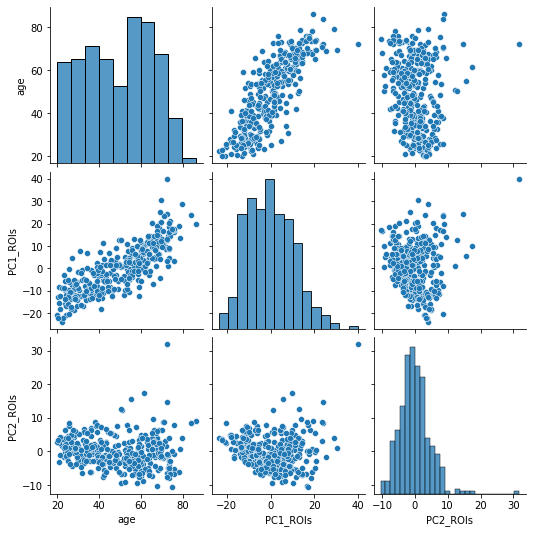

In [20]:
sns.pairplot(df)
print(df.corr())

### Neurobiological effect of age

PC1_ROIs is higlhy correlated with age Thus age seems to be the main source of variability.

Question: what is Neurobiological effect of age ? Lets explore the hypothesis of brain atrophy.

We compute brain atrophy indices:

- GM_ratio: GM_Vol / (GM_Vol + WM_Vol + CSF_Vol). It is ratio of GM in the brain.
- WM_ratio: WM_Vol / (GM_Vol + WM_Vol + CSF_Vol). It is ratio of WM in the brain.

           PC1_ROIs       age  GM_ratio  WM_ratio  CSF_ratio
PC1_ROIs   1.000000  0.817702 -0.944958 -0.467386   0.960228
age        0.817702  1.000000 -0.818380 -0.345080   0.803764
GM_ratio  -0.944958 -0.818380  1.000000  0.225909  -0.890849
WM_ratio  -0.467386 -0.345080  0.225909  1.000000  -0.643805
CSF_ratio  0.960228  0.803764 -0.890849 -0.643805   1.000000


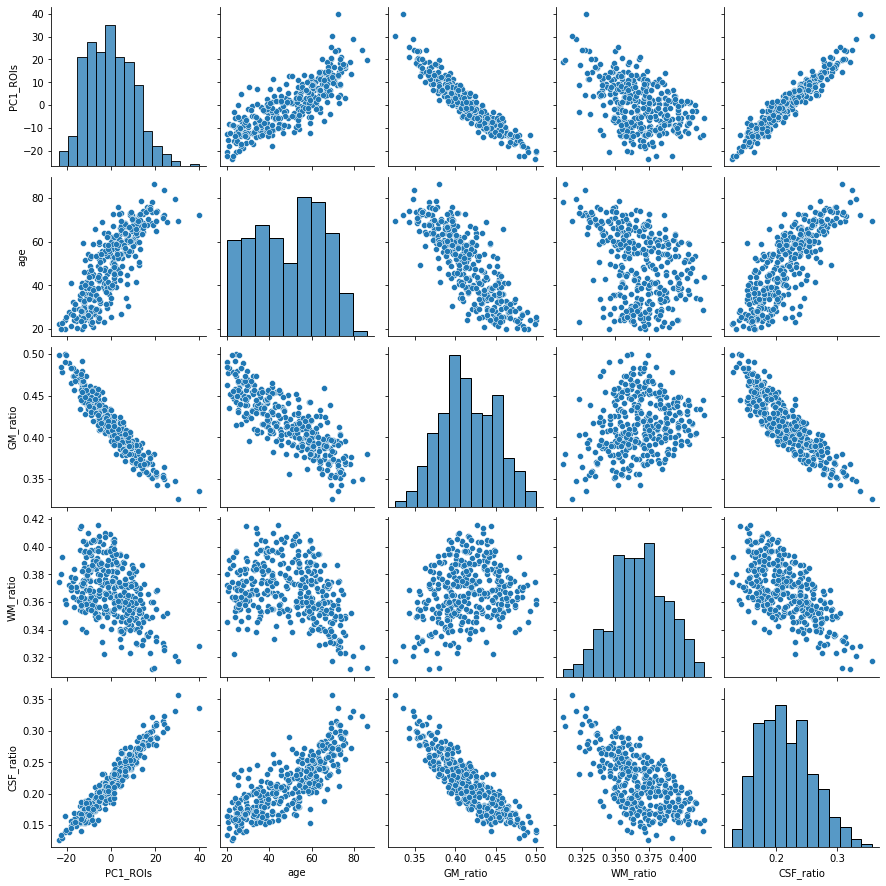

In [21]:
df["GM_ratio"] = vols_train.loc[:, "GM_Vol"] / vols_train.sum(axis=1)
df["WM_ratio"] = vols_train.loc[:, "WM_Vol"] / vols_train.sum(axis=1)
df["CSF_ratio"] = vols_train.loc[:, "CSF_Vol"] / vols_train.sum(axis=1)

sns.pairplot(df[["PC1_ROIs", "age", "GM_ratio", "WM_ratio","CSF_ratio"]])
print(df[["PC1_ROIs", "age", "GM_ratio", "WM_ratio", "CSF_ratio"]].corr())

Very strong effect on GM:
- GM_ratio correlate with PC1_ROIs
- GM_ratio correlate with age

Effect on WM:
- WM_ratio correlate with PC1_ROIs
- WM_ratio correlate with age


Aging (strongly correlates with PC1) and leads to decrease of GM_ratio and increase of CSF_ratio:

### Conclusion

**Aging leads to brain atrophy with is the main source of brain variability.
Therefore it should be possible to predict the age form the brain anatomy.**

In [22]:
rois_train

,l3thVen_GM_Vol,r3thVen_GM_Vol,l4thVen_GM_Vol,r4thVen_GM_Vol,lAcc_GM_Vol,rAcc_GM_Vol,lAmy_GM_Vol,rAmy_GM_Vol,lBst_GM_Vol,rBst_GM_Vol,...,lSupParLo_CSF_Vol,rSupParLo_CSF_Vol,lSupTemGy_CSF_Vol,rSupTemGy_CSF_Vol,lTemPo_CSF_Vol,rTemPo_CSF_Vol,lInfFroAngGy_CSF_Vol,rInfFroAngGy_CSF_Vol,lTemTraGy_CSF_Vol,rTemTraGy_CSF_Vol
0,0.046239,0.052240,0.063827,0.068097,0.419533,0.427702,0.959560,0.926567,0.423190,0.475538,...,9.417022,8.434683,2.347495,2.171560,5.581092,5.706735,1.890379,1.612733,0.282384,0.266220
1,0.052599,0.047901,0.088186,0.105241,0.373451,0.377817,1.069637,0.976732,0.548313,0.646422,...,7.536400,9.255206,1.916260,2.486424,4.316001,4.436970,1.498470,1.539997,0.353374,0.321598
2,0.063052,0.051575,0.083113,0.076834,0.447264,0.465415,1.043697,0.930962,0.404125,0.448916,...,4.173962,4.718189,1.629146,2.401178,4.425915,5.277551,1.237723,1.587169,0.268964,0.222488
3,0.043962,0.041684,0.089264,0.083791,0.391540,0.388656,1.008897,1.005822,0.554708,0.679916,...,9.709334,8.910621,2.647267,2.810882,5.631827,6.304696,2.004819,1.836838,0.414907,0.470546
4,0.042226,0.036072,0.073829,0.081725,0.339043,0.358513,0.690936,0.813410,0.438054,0.467994,...,9.136128,9.851541,3.001734,2.822341,6.769050,6.473654,2.135641,2.037486,0.418933,0.439689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.039361,0.039335,0.060274,0.057841,0.431451,0.417681,1.044920,1.001219,0.428247,0.470148,...,8.160665,9.731094,2.176555,2.282556,4.437240,4.504228,1.635577,1.413291,0.353791,0.299222
353,0.075745,0.044148,0.074403,0.063508,0.455139,0.451087,1.013503,0.969017,0.345757,0.407549,...,4.303661,4.670829,1.475882,1.404434,3.198998,3.017578,1.199771,1.163728,0.072432,0.095027
354,0.042164,0.036127,0.068018,0.056144,0.375827,0.397191,0.885517,0.853494,0.267288,0.252814,...,8.357738,8.542951,2.464557,2.947965,5.786969,6.389739,1.739823,1.873484,0.292447,0.436121
355,0.077834,0.041442,0.081778,0.092392,0.466365,0.467192,0.872434,0.846606,0.460973,0.481234,...,9.664075,10.025763,2.232142,2.967895,5.573102,5.070158,1.794367,1.665238,0.270916,0.268293


In [25]:
df = pd.DataFrame(dict(age=participants_train['age'],rois_train, PC1_ROIs=PCs_rois[:, 0], PC2_ROIs=PCs_rois[:, 1]))
df

SyntaxError: positional argument follows keyword argument (<ipython-input-25-db6fa5ce2fa2>, line 1)

## Machine learning


Import and read data

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.linear_model import Ridge
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics
import problem

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

In [3]:
X_train, y_train = problem.get_train_data()
X_test, y_test = problem.get_test_data()

assert X_train.shape[1] == 284 + 331695

In [4]:
X_train.shape

(357, 331979)

## Utils functions

Function to compute scores

In [5]:
def cv_train_test_scores(rmse_cv_test, rmse_cv_train, r2_cv_test, r2_cv_train,
                         y_train, y_pred_train, y_test, y_pred_test):
    """Compute CV score, train and test score from a cv grid search model.

    Parameters
    ----------
    rmse_cv_test : array
        Test rmse across CV folds.
    rmse_cv_train : array
        Train rmse across CV folds.

    r2_cv_test : array
        Test R2 across CV folds.
    r2_cv_train : array
        Train R2 across CV folds.

    y_train : array
        True train values.
    y_pred_train : array
        Predicted train values.
    y_test : array
        True test values.
    y_pred_test : array
        Predicted test values.

    Returns
    -------
    info : TYPE
        DataFrame(r2_cv, r2_train, mae_train, mse_train).
    """
    # CV scores
    rmse_cv_test_mean, rmse_cv_test_sd = np.mean(rmse_cv_test), np.std(rmse_cv_test)
    rmse_cv_train_mean, rmse_cv_train_sd = np.mean(rmse_cv_train), np.std(rmse_cv_train)

    r2_cv_test_mean, r2_cv_test_sd = np.mean(r2_cv_test), np.std(r2_cv_test)
    r2_cv_train_mean, r2_cv_train_sd = np.mean(r2_cv_train), np.std(r2_cv_train)

    # Test scores
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    r2_test = metrics.r2_score(y_test, y_pred_test)

    # Train scores
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    r2_train = metrics.r2_score(y_train, y_pred_train)

    
    scores = pd.DataFrame([[rmse_cv_test_mean, rmse_cv_test_sd, rmse_cv_train_mean, rmse_cv_train_sd,
                            r2_cv_test_mean, rmse_cv_test_sd, r2_cv_train_mean, r2_cv_train_sd,
                            rmse_test, r2_test, rmse_train, r2_train
                           ]],
                        columns=('rmse_cv_test_mean', 'rmse_cv_test_sd', 'rmse_cv_train_mean', 'rmse_cv_train_sd',
                                 'r2_cv_test_mean', 'rmse_cv_test_sd', 'r2_cv_train_mean', 'r2_cv_train_sd',
                                 'rmse_test', 'r2_test', 'rmse_train', 'r2_train'
                                 ))

    return scores

## Feature extractor of ROIs or voxels within the brain (VBM)

Selecting only rois or vbm images:

This can be achieved by a `ROIsFeatureExtractor` or `VBMFeatureExtractor` 

In [6]:
class ROIsFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, :284]

class VBMFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, 284:]


fe = ROIsFeatureExtractor()
print(fe.transform(X_train).shape)

fe = VBMFeatureExtractor()
print(fe.transform(X_train).shape)

(357, 284)
(357, 331695)


In [9]:
from sklearn.linear_model import ElasticNet as en
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


cv = problem.get_cv(X_train, y_train)


elas=en(alpha=1, l1_ratio=0.05,fit_intercept=True,normalize=False, precompute=False, max_iter=10000,
   copy_X=True, tol=0.0001, warm_start=False, positive=False,random_state=123,
   selection='random')


estimator = make_pipeline(VBMFeatureExtractor(), StandardScaler(), elas)


cv_results = cross_validate(estimator, X_train, y_train, scoring=['neg_root_mean_squared_error', 'r2'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=-1)


# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)

print("Important scores are rmse_cv_test_mean and rmse_test")
cv_train_test_scores(rmse_cv_test=-cv_results['test_neg_root_mean_squared_error'],
                     rmse_cv_train=-cv_results['train_neg_root_mean_squared_error'],
                     r2_cv_test=cv_results['test_r2'],
                     r2_cv_train=cv_results['train_r2'],
                     y_train=y_train, y_pred_train=y_pred_train, y_test=y_test, y_pred_test=y_pred_test).T.round(3)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.4min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished


Important scores are rmse_cv_test_mean and rmse_test


,0
rmse_cv_test_mean,6.526
rmse_cv_test_sd,0.576
rmse_cv_train_mean,0.344
rmse_cv_train_sd,0.004
r2_cv_test_mean,0.832
rmse_cv_test_sd,0.576
r2_cv_train_mean,1.000
r2_cv_train_sd,0.000
rmse_test,6.665
r2_test,0.859


In [13]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso

cv = problem.get_cv(X_train, y_train)

ls = Lasso(alpha=0.1, fit_intercept=True, tol=0.0001, warm_start=False, 
           random_state=123, selection='cyclic')

estimator = make_pipeline(ROIsFeatureExtractor(), StandardScaler(), ls)

selector = RFECV(estimator, step=50, min_features_to_select=15, cv=cv, scoring='neg_root_mean_squared_error',
                 verbose=0, n_jobs=-1)

selector = selector.fit(X_train, y_train)

ValueError: when `importance_getter=='auto'`, the underlying estimator Pipeline should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [11]:
from sklearn import ensemble
cv = problem.get_cv(X_train, y_train)

params = {'n_estimators': 100,
          'max_depth': 4,
          'learning_rate': 0.01,
          'max_features':'sqrt',
          'loss': 'ls'}

xgb = ensemble.GradientBoostingRegressor(**params)

estimator = make_pipeline(VBMFeatureExtractor(), StandardScaler(), xgb)

cv_results = cross_validate(estimator, X_train, y_train, scoring=['neg_root_mean_squared_error', 'r2'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=-1)

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)

print("Important scores are rmse_cv_test_mean and rmse_test")
cv_train_test_scores(rmse_cv_test=-cv_results['test_neg_root_mean_squared_error'],
                     rmse_cv_train=-cv_results['train_neg_root_mean_squared_error'],
                     r2_cv_test=cv_results['test_r2'],
                     r2_cv_train=cv_results['train_r2'],
                     y_train=y_train, y_pred_train=y_pred_train, y_test=y_test, y_pred_test=y_pred_test).T.round(3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   35.6s remaining:   53.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.9s finished


Important scores are rmse_cv_test_mean and rmse_test


,0
rmse_cv_test_mean,11.113
rmse_cv_test_sd,0.741
rmse_cv_train_mean,7.455
rmse_cv_train_sd,0.083
r2_cv_test_mean,0.515
rmse_cv_test_sd,0.741
r2_cv_train_mean,0.785
r2_cv_train_sd,0.002
rmse_test,12.386
r2_test,0.513


## Design of predictors and their evaluation using CV and test set

The framework is evaluated with a 
cross-validation approach. The metrics used are the root-mean-square error (RMSE).

First we propose a simple Regression predictor based on ROIs features only:

Those are **really bad results:**

- Using CV **we can predict the age +- 47.8 years of error !!!**.
- Using independant test set **we can predict the age +- 14.3 years of error !!!**.

Then we test a simple Regression predictor based on vbm features:

In [19]:
from sklearn.model_selection import GridSearchCV

cv = problem.get_cv(X_train, y_train)

param_grid_rf = { 
            "n_estimators"      : [10,20,30,50,100],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, scoring="neg_root_mean_squared_error")

In [20]:
estimator = make_pipeline(ROIsFeatureExtractor(), StandardScaler(), search)


cv_results = cross_validate(estimator, X_train, y_train, scoring=['neg_root_mean_squared_error', 'r2'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=-1)

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)

print("Important scores are rmse_cv_test_mean and rmse_test")
cv_train_test_scores(rmse_cv_test=-cv_results['test_neg_root_mean_squared_error'],
                     rmse_cv_train=-cv_results['train_neg_root_mean_squared_error'],
                     r2_cv_test=cv_results['test_r2'],
                     r2_cv_train=cv_results['train_r2'],
                     y_train=y_train, y_pred_train=y_pred_train, y_test=y_test, y_pred_test=y_pred_test).T.round(3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.1min remaining:  7.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.1min finished


Important scores are rmse_cv_test_mean and rmse_test


,0
rmse_cv_test_mean,8.417
rmse_cv_test_sd,0.889
rmse_cv_train_mean,1.971
rmse_cv_train_sd,1.587
r2_cv_test_mean,0.719
rmse_cv_test_sd,0.889
r2_cv_train_mean,0.976
r2_cv_train_sd,0.027
rmse_test,8.113
r2_test,0.791


In [24]:
search.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 100}

# Test regression linéaire sur données ROIS

In [14]:
estimator = make_pipeline(ROIsFeatureExtractor(), StandardScaler(),LinearRegression())

cv = problem.get_cv(X_train, y_train)

cv_results = cross_validate(estimator, X_train, y_train, scoring=['neg_root_mean_squared_error', 'r2'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=-1)


# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)

cv_train_test_scores(rmse_cv_test=-cv_results['test_neg_root_mean_squared_error'],
                     rmse_cv_train=-cv_results['train_neg_root_mean_squared_error'],
                     r2_cv_test=cv_results['test_r2'],
                     r2_cv_train=cv_results['train_r2'],
                     y_train=y_train, y_pred_train=y_pred_train, y_test=y_test, y_pred_test=y_pred_test).T.round(3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.3s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.5s finished


,0
rmse_cv_test_mean,47.793
rmse_cv_test_sd,16.807
rmse_cv_train_mean,0.639
rmse_cv_train_sd,0.288
r2_cv_test_mean,-8.540
rmse_cv_test_sd,16.807
r2_cv_train_mean,0.998
r2_cv_train_sd,0.002
rmse_test,14.350
r2_test,0.347


# Test regression linéaire pénaliser sur données ROIS

In [29]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

estimator = make_pipeline(ROIsFeatureExtractor(), StandardScaler(),Lasso(alpha=0.125))

cv = problem.get_cv(X_train, y_train)

cv_results = cross_validate(estimator, X_train, y_train, scoring=['neg_root_mean_squared_error', 'r2'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=-1)


# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)

cv_train_test_scores(rmse_cv_test=-cv_results['test_neg_root_mean_squared_error'],
                     rmse_cv_train=-cv_results['train_neg_root_mean_squared_error'],
                     r2_cv_test=cv_results['test_r2'],
                     r2_cv_train=cv_results['train_r2'],
                     y_train=y_train, y_pred_train=y_pred_train, y_test=y_test, y_pred_test=y_pred_test).T.round(3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.3s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.4s finished


,0
rmse_cv_test_mean,7.332
rmse_cv_test_sd,0.486
rmse_cv_train_mean,4.446
rmse_cv_train_sd,0.062
r2_cv_test_mean,0.786
rmse_cv_test_sd,0.486
r2_cv_train_mean,0.923
r2_cv_train_sd,0.002
rmse_test,6.078
r2_test,0.883


# Test random forest sur données ROIS

In [19]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

estimator = make_pipeline(ROIsFeatureExtractor(), StandardScaler(), RandomForestRegressor())

cv = problem.get_cv(X_train, y_train)



cv_results = cross_validate(estimator, X_train, y_train, scoring=['neg_root_mean_squared_error', 'r2'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=-1)


# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)

cv_train_test_scores(rmse_cv_test=-cv_results['test_neg_root_mean_squared_error'],
                     rmse_cv_train=-cv_results['train_neg_root_mean_squared_error'],
                     r2_cv_test=cv_results['test_r2'],
                     r2_cv_train=cv_results['train_r2'],
                     y_train=y_train, y_pred_train=y_pred_train, y_test=y_test, y_pred_test=y_pred_test).T.round(3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.6s remaining:   16.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.8s finished


,0
rmse_cv_test_mean,8.191
rmse_cv_test_sd,0.722
rmse_cv_train_mean,3.161
rmse_cv_train_sd,0.071
r2_cv_test_mean,0.735
rmse_cv_test_sd,0.722
r2_cv_train_mean,0.961
r2_cv_train_sd,0.001
rmse_test,8.061
r2_test,0.794


# Test regression linéaire sur données VBM

In [14]:
estimator = make_pipeline(VBMFeatureExtractor(), StandardScaler(),LinearRegression())

cv = problem.get_cv(X_train, y_train)

cv_results = cross_validate(estimator, X_train, y_train, scoring=['neg_root_mean_squared_error', 'r2'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=-1)


# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)

cv_train_test_scores(rmse_cv_test=-cv_results['test_neg_root_mean_squared_error'],
                     rmse_cv_train=-cv_results['train_neg_root_mean_squared_error'],
                     r2_cv_test=cv_results['test_r2'],
                     r2_cv_train=cv_results['train_r2'],
                     y_train=y_train, y_pred_train=y_pred_train, y_test=y_test, y_pred_test=y_pred_test).T.round(3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


,0
rmse_cv_test_mean,6.967
rmse_cv_test_sd,0.639
rmse_cv_train_mean,0.000
rmse_cv_train_sd,0.000
r2_cv_test_mean,0.808
rmse_cv_test_sd,0.639
r2_cv_train_mean,1.000
r2_cv_train_sd,0.000
rmse_test,6.783
r2_test,0.854


# Test regression linéaire pénaliser sur données VBM

On tente de battre la régression linéaire classique déja exécuter en ajoutant des parametres de régulations (lasso, ridge elastic net).

In [18]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

estimator = make_pipeline(VBMFeatureExtractor(), StandardScaler(),Ridge(alpha=0.1))

cv = problem.get_cv(X_train, y_train)

cv_results = cross_validate(estimator, X_train, y_train, scoring=['neg_root_mean_squared_error', 'r2'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=-1)


# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)

cv_train_test_scores(rmse_cv_test=-cv_results['test_neg_root_mean_squared_error'],
                     rmse_cv_train=-cv_results['train_neg_root_mean_squared_error'],
                     r2_cv_test=cv_results['test_r2'],
                     r2_cv_train=cv_results['train_r2'],
                     y_train=y_train, y_pred_train=y_pred_train, y_test=y_test, y_pred_test=y_pred_test).T.round(3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.5s remaining:   33.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.8s finished


,0
rmse_cv_test_mean,6.968
rmse_cv_test_sd,0.640
rmse_cv_train_mean,0.000
rmse_cv_train_sd,0.000
r2_cv_test_mean,0.808
rmse_cv_test_sd,0.640
r2_cv_train_mean,1.000
r2_cv_train_sd,0.000
rmse_test,6.784
r2_test,0.854


# Test Random Forest sur données VBM

In [13]:
estimator = make_pipeline(VBMFeatureExtractor(), StandardScaler(), RandomForestRegressor(n_estimators=100,max_features='sqrt'))

cv = problem.get_cv(X_train, y_train)

cv_results = cross_validate(estimator, X_train, y_train, scoring=['neg_root_mean_squared_error', 'r2'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=-1)


# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)

cv_train_test_scores(rmse_cv_test=-cv_results['test_neg_root_mean_squared_error'],
                     rmse_cv_train=-cv_results['train_neg_root_mean_squared_error'],
                     r2_cv_test=cv_results['test_r2'],
                     r2_cv_train=cv_results['train_r2'],
                     y_train=y_train, y_pred_train=y_pred_train, y_test=y_test, y_pred_test=y_pred_test).T.round(3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


,0
rmse_cv_test_mean,9.467
rmse_cv_test_sd,0.701
rmse_cv_train_mean,3.544
rmse_cv_train_sd,0.078
r2_cv_test_mean,0.647
rmse_cv_test_sd,0.701
r2_cv_train_mean,0.951
r2_cv_train_sd,0.002
rmse_test,10.181
r2_test,0.671


- Using CV **we can predict the age +- 7 years of error**.
- Using independant test set **we can predict the age +- 6.7 years of error**.

Your turn to do better !

In [ ]:
estimator = make_pipeline(VBMFeatureExtractor(), StandardScaler(), LinearRegression())

cv = problem.get_cv(X_train, y_train)

cv_results = cross_validate(estimator, X_train, y_train, scoring=['neg_root_mean_squared_error', 'r2'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=-1)

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)

cv_train_test_scores(rmse_cv_test=-cv_results['test_neg_root_mean_squared_error'],
                     rmse_cv_train=-cv_results['train_neg_root_mean_squared_error'],
                     r2_cv_test=cv_results['test_r2'],
                     r2_cv_train=cv_results['train_r2'],
                     y_train=y_train, y_pred_train=y_pred_train, y_test=y_test, y_pred_test=y_pred_test).T.round(3)

## Test submission locally

The submissions need to be located in the submissions folder. For instance for `starting_kit`, it should be located in `submissions/submissions/starting_kit`.

Copy everything required (the cell bellow) to build your estimator in a submission file: `submissions/submissions/starting_kit/estimator.py`. This file must contain a function `get_estimator()`:

In [14]:
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


class ROIsFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, :284]


def get_estimator():
    """Build your estimator here."""
    estimator = make_pipeline(VBMFeatureExtractor(), StandardScaler(), Ridge())

    return estimator

Pipeline(steps=[('vbmfeatureextractor', VBMFeatureExtractor()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Run locally:
    
```
ramp-test --submission starting_kit
```

## Submission on RAMP:


Follow the instructions: [Submitting to a ramp event](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html#submitting-to-a-ramp-event)

The event is [Predict age from brain grey matter (regression)](https://ramp.studio/problems/brain_age)

## Optional: convert flat vbm data back to 3D

If you plan to use convolutional networks, you will need to convert flat vbm data back to 3D. The brain mask contains all the necessary information:

In [18]:
def get_mask(path='.'):
    imgs_arr_zip = np.load(os.path.join(path, 'data', "%s_vbm.npz" % "train"))
    return imgs_arr_zip['mask_arr']

def flat_to_3d(X_flat, mask_arr):
    """Convert flat n_subjects * nb_features array into 5D array of shape:
        nb_subjects * 1 * X * Y * Z dataset.
    """
    n_subjects = X_flat.shape[0]
    arr5d_shape = tuple([n_subjects, 1] +  list(mask_arr.shape))
    arr5d = np.zeros(arr5d_shape)
    arr5d[:, 0, mask_arr] = X_flat

    return arr5d

mask_arr = get_mask()
X_train, y_train = problem.get_train_data()
X_train_vbm_flat = VBMFeatureExtractor().transform(X_train)

X_train_vbm_3d = flat_to_3d(X_train_vbm_flat, mask_arr)
assert np.all(X_train_vbm_3d.squeeze()[:, mask_arr] == X_train_vbm_flat)

print("Flat data shape:", X_train_vbm_flat.shape, "3D data shape:", X_train_vbm_3d.shape)

Flat data shape: (357, 331695) 3D data shape: (357, 1, 121, 145, 121)
